In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
## Read PM2.5 data at June 05, 2019
df1 = pd.read_csv('./data/covariate0605.csv')
df2 = pd.read_csv('./data/pm25_0605.csv')

In [3]:
df1.head(5)

,Unnamed: 0,long,lat,prec,temp,pres,rh,uwind,vwind
0,41242,-69.111491,47.386418,0.283942,278.605652,96929.570312,79.589600,4.852976,1.651037
1,41243,-68.736976,47.244262,0.276129,278.605652,97242.070312,79.589600,4.470163,1.646155
2,41244,-68.364554,47.100850,0.276129,279.753113,98692.070312,75.652100,4.477976,1.624670
3,41245,-67.994227,46.956192,0.604254,280.398621,98792.070312,77.417725,4.096140,1.615881
4,41589,-69.318835,47.131182,0.174567,278.424988,96567.070312,77.456787,5.140085,1.481116


In [4]:
df2.head(5)

,Unnamed: 0,Longitude,Latitude,PM25,PM_class
0,1,-80.482778,25.471944,4.400000,1
1,2,-80.215556,25.794222,4.929167,1
2,3,-97.493830,25.892518,8.213636,1
3,4,-80.326389,25.941944,4.100000,1
4,5,-80.256944,26.053889,4.992754,1


In [5]:
covariates = df1.values[:,3:]
covariates.shape

(7706, 6)

In [6]:
aqs_lonlat=df2.values[:,[1,2]]
aqs_lonlat.shape

(842, 2)

### Pair the long and lat based on the nearest neighbor

In [7]:
from scipy import spatial
near = df1.values[:,[1,2]]
tree = spatial.KDTree(list(zip(near[:,0].ravel(), near[:,1].ravel())))
tree.data
idx = tree.query(aqs_lonlat)[1]

In [8]:
df2_new = df2.assign(neighbor = idx)
df_pm25 = df2_new.groupby('neighbor')['PM25'].mean()
df_pm25_class = pd.cut(df_pm25,bins=[0,12.1,35.5],labels=["0","1"])
idx_new = df_pm25.index.values

In [34]:
df_pm25

neighbor
2       5.020834
7       3.837500
50      2.041666
59      3.669444
70      1.020833
          ...   
7671    5.168750
7672    6.041666
7678    8.704166
7703    8.725000
7705    8.213636
Name: PM25, Length: 605, dtype: float64

In [9]:
np.array(pd.Categorical(df_pm25_class).codes, dtype = int)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [10]:
pm25 = df_pm25.values
#pm25_class = np.array(df_pm25_class.values,dtype=int)
pm25_class = np.array(pd.Categorical(df_pm25_class).codes, dtype = int)
z = pm25[:,None]
z_class = pm25_class[:,None]

In [11]:
lon = df1.values[:,1]
lat = df1.values[:,2]
normalized_lon = (lon-min(lon))/(max(lon)-min(lon))
normalized_lat = (lat-min(lat))/(max(lat)-min(lat))
N = lon.shape[0]

In [35]:
N

7706

In [13]:
num_basis = [10**2,19**2,37**2]
for i in num_basis:
    print(np.linspace(0,1,np.sqrt(i).astype(int)))

knots_1dx = [np.linspace(0,1,np.sqrt(i).astype(int)) for i in num_basis]
knots_1dy = [np.linspace(0,1,np.sqrt(i).astype(int)) for i in num_basis]


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5        0.55555556 0.61111111
 0.66666667 0.72222222 0.77777778 0.83333333 0.88888889 0.94444444
 1.        ]
[0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.19444444 0.22222222 0.25       0.27777778 0.30555556
 0.33333333 0.36111111 0.38888889 0.41666667 0.44444444 0.47222222
 0.5        0.52777778 0.55555556 0.58333333 0.61111111 0.63888889
 0.66666667 0.69444444 0.72222222 0.75       0.77777778 0.80555556
 0.83333333 0.86111111 0.88888889 0.91666667 0.94444444 0.97222222
 1.        ]


In [36]:
knots_1dx

[array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
        0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
        0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
        0.83333333, 0.88888889, 0.94444444, 1.        ]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.94444444,
        0.97222222, 1.        ])]

In [37]:
num_basis = [10**2,19**2,37**2]
knots_1dx = [np.linspace(0,1,np.sqrt(i).astype(int)) for i in num_basis]
knots_1dy = [np.linspace(0,1,np.sqrt(i).astype(int)) for i in num_basis]
##Wendland kernel
basis_size = 0
phi = np.zeros((N, sum(num_basis)))
for res in range(len(num_basis)):
    theta = 1/np.sqrt(num_basis[res])*2.5
    knots_x, knots_y = np.meshgrid(knots_1dx[res],knots_1dy[res])
    knots = np.column_stack((knots_x.flatten(),knots_y.flatten()))
    for i in range(num_basis[res]):
        d = np.linalg.norm(np.vstack((normalized_lon,normalized_lat)).T-knots[i,:],axis=1)/theta
        for j in range(len(d)):
            if d[j] >= 0 and d[j] <= 1:
                phi[j,i + basis_size] = (1-d[j])**6 * (35 * d[j]**2 + 18 * d[j] + 3)/3
            else:
                phi[j,i + basis_size] = 0
    basis_size = basis_size + num_basis[res]

In [73]:
phi[3,:].max()

0.9560186481952521

In [66]:
res = 0
theta = 1/np.sqrt(num_basis[res])*2.5
knots_x, knots_y = np.meshgrid(knots_1dx[res],knots_1dy[res])
knots = np.column_stack((knots_x.flatten(),knots_y.flatten()))
#for i in range(num_basis[res]):
#    print(i)
#   print(knots[i,:])

d = np.linalg.norm(np.vstack((normalized_lon,normalized_lat)).T-knots[i,:],axis=1)/theta
basis_size = 0
for j in range(len(d)):
            if d[j] >= 0 and d[j] <= 1:
                phi[j,i + basis_size] = (1-d[j])**6 * (35 * d[j]**2 + 18 * d[j] + 3)/3
            else:
                phi[j,i + basis_size] = 0
print(phi[0:9,0])


[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
print(knots[0,:])
print(np.vstack((normalized_lon,normalized_lat)).T-knots[0,:])
print(np.linalg.norm(np.vstack((normalized_lon,normalized_lat)).T-knots[0,:], axis = 1))
print(np.linalg.norm(np.vstack((normalized_lon,normalized_lat)).T-knots[0,:], axis = 1) / theta)

[0. 0.]
[[0.96725502 0.91812118]
 [0.97380125 0.9122209 ]
 [0.98031088 0.90626846]
 ...
 [0.46017898 0.03567999]
 [0.46538939 0.03432521]
 [0.47059468 0.03292622]]
[1.33361493 1.33432974 1.33504005 ... 0.46156013 0.46665351 0.47174515]
[5.33445972 5.33731896 5.34016021 ... 1.84624053 1.86661405 1.8869806 ]


In [61]:
np.sqrt((0.96725502**2 + 0.91812118**2))

1.3336149275108586

In [45]:
knots

array([[0.        , 0.        ],
       [0.11111111, 0.        ],
       [0.22222222, 0.        ],
       [0.33333333, 0.        ],
       [0.44444444, 0.        ],
       [0.55555556, 0.        ],
       [0.66666667, 0.        ],
       [0.77777778, 0.        ],
       [0.88888889, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.11111111],
       [0.11111111, 0.11111111],
       [0.22222222, 0.11111111],
       [0.33333333, 0.11111111],
       [0.44444444, 0.11111111],
       [0.55555556, 0.11111111],
       [0.66666667, 0.11111111],
       [0.77777778, 0.11111111],
       [0.88888889, 0.11111111],
       [1.        , 0.11111111],
       [0.        , 0.22222222],
       [0.11111111, 0.22222222],
       [0.22222222, 0.22222222],
       [0.33333333, 0.22222222],
       [0.44444444, 0.22222222],
       [0.55555556, 0.22222222],
       [0.66666667, 0.22222222],
       [0.77777778, 0.22222222],
       [0.88888889, 0.22222222],
       [1.        , 0.22222222],
       [0.

In [15]:
## Romove the all-zero columns
idx_zero = np.array([], dtype=int)
for i in range(phi.shape[1]):
    if sum(phi[:,i]!=0)==0:
        idx_zero = np.append(idx_zero,int(i))

In [16]:
phi_reduce = np.delete(phi,idx_zero,1)
print(phi.shape)
print(phi_reduce.shape)

(7706, 1830)
(7706, 1486)


In [17]:
phi_obs = phi_reduce[idx_new,:]
s_obs = np.vstack((normalized_lon[idx_new],normalized_lat[idx_new])).T
X = covariates[idx_new,:]
normalized_X = X
for i in range(X.shape[1]):
    normalized_X[:,i] = (X[:,i]-min(X[:,i]))/(max(X[:,i])-min(X[:,i]))
N_obs = X.shape[0]

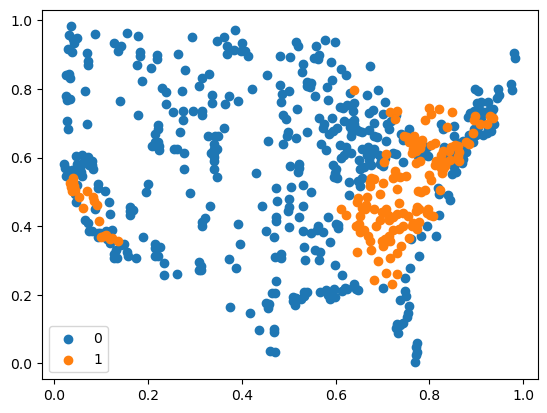

In [18]:
# scatter plot of the circles dataset with points colored by class
from numpy import where
from matplotlib import pyplot
# select indices of points with each class label
for i in range(2):
	samples_ix = where(z_class[:,0] == i)
	pyplot.scatter(s_obs[samples_ix, 0], s_obs[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [19]:
## Save the prepocessed data for Kriging
z_log = np.log(z)
kriging = np.concatenate((s_obs, normalized_X, z, z_class,z_log),axis=1)
traindf=pd.DataFrame(kriging)
traindf.to_csv('./data/kriging.csv')

/var/folders/ws/m03sh3xd4ns621mckfrht3r0000_08/T/ipykernel_82217/195722182.py:2: RuntimeWarning: divide by zero encountered in log
  z_log = np.log(z)


## DeepKriging and baseline DNN performance

### Load the useful functions

In [ ]:
def deep_model(model, X_train, y_train, X_valid, y_valid, data_type):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    if data_type == 'continuous':
        model.compile(optimizer='adam'
                      , loss='mse'
                      , metrics=['mse','mae'])
    if data_type == 'discrete':
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test, verbose=0)
    return results
    
def optimal_epoch(model_hist):
    '''
    Function to return the epoch number where the validation loss is
    at its minimum
    
    Parameters:
        model_hist : training history of model
    Output:
        epoch number with minimum validation loss
    '''
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    return min_epoch

### Specify the model structure

In [ ]:
# DeepKriging model for continuous data
p = covariates.shape[1] + phi_reduce.shape[1]
model = Sequential()
model.add(Dense(100, input_dim = p,  kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [ ]:
# DeepKriging model for categorical data
model_class = Sequential()
model_class.add(Dense(100, input_dim = p,  kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dropout(rate=0.5))
model_class.add(BatchNormalization())
model_class.add(Dense(100, activation='relu'))
model_class.add(Dropout(rate=0.5))
model_class.add(Dense(100, activation='relu'))
model_class.add(BatchNormalization())
model_class.add(Dense(1, activation='sigmoid'))

In [ ]:
# Baseline DNN only with covariates and coordinates
p_base = covariates.shape[1] + s_obs.shape[1]
# Neural network
model_base = Sequential()
model_base.add(Dense(100, input_dim=p_base,  kernel_initializer='he_uniform', activation='relu'))
model_base.add(Dropout(rate=0.5))
model_base.add(BatchNormalization())
model_base.add(Dense(100, activation='relu'))
model_base.add(Dropout(rate=0.5))
model_base.add(Dense(100, activation='relu'))
model_base.add(BatchNormalization())
model_base.add(Dense(1, activation='linear'))

In [ ]:
# Baseline DNN for classification
model_base_class = Sequential()
model_base_class.add(Dense(100, input_dim=p_base,  kernel_initializer='he_uniform', activation='relu'))
model_base_class.add(Dropout(rate=0.5))
model_base_class.add(BatchNormalization())
model_base_class.add(Dense(100, activation='relu'))
model_base_class.add(Dropout(rate=0.5))
model_base_class.add(Dense(100, activation='relu'))
model_base_class.add(BatchNormalization())
model_base_class.add(Dense(1, activation='sigmoid'))

### Run cross-validation

In [ ]:
from sklearn.model_selection import KFold
NB_START_EPOCHS = 200  # Number of epochs we usually start to train with
BATCH_SIZE = 64  # Size of the batches used in the mini-batch gradient descent

In [ ]:
normalized_X

In [ ]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 123)
fold_no = 1
inputs = np.hstack((normalized_X,phi_obs))
inputs_base = np.hstack((normalized_X,s_obs))
targets = z
targets_class = z_class
mse_per_fold = []
mse_per_fold_base = []
mae_per_fold = []
mae_per_fold_base = []
acc_per_fold = []
acc_per_fold_base = []
for train_idx, test_idx in kfold.split(inputs, targets):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = deep_model(model, inputs[train_idx], targets[train_idx,0:1]\
                              , inputs[test_idx], targets[test_idx,0:1],'continuous')
    history_base = deep_model(model_base, inputs_base[train_idx], targets[train_idx,0:1]\
                              , inputs_base[test_idx], targets[test_idx,0:1],'continuous')
    ## Classification
    history_class = deep_model(model_class, inputs[train_idx], targets_class[train_idx,0:1]\
                              , inputs[test_idx], targets_class[test_idx,0:1],'discrete')
    history_base_class = deep_model(model_base_class, inputs_base[train_idx], targets_class[train_idx,0:1]\
                              , inputs_base[test_idx], targets_class[test_idx,0:1],'discrete')
    model_optim = 200#optimal_epoch(history)
    model_optim_base = 200#optimal_epoch(history_base)
    result = test_model(model, inputs[train_idx], targets[train_idx,0:1], inputs[test_idx]\
                        , targets[test_idx,0:1], model_optim)
    result_base = test_model(model_base, inputs_base[train_idx], targets[train_idx,0:1], inputs_base[test_idx]\
                             , targets[test_idx,0:1], model_optim_base)
    scores = result
    scores_base = result_base
    print(f'The performance of DeepKriging: MSE = {scores[1]}, MAE = {scores[2]}')
    print(f'The performance of classical DNN: MSE = {scores_base[1]}, MAE = {scores_base[2]}')
    model_optim_class = 200#optimal_epoch(history_class)
    model_optim_base_class = 200#optimal_epoch(history_base_class)
    result_class = test_model(model_class, inputs[train_idx], targets_class[train_idx,0:1], inputs[test_idx]\
                        , targets_class[test_idx,0:1], model_optim_class)
    result_base_class = test_model(model_base_class, inputs_base[train_idx], targets_class[train_idx,0:1], inputs_base[test_idx]\
                             , targets_class[test_idx,0:1], model_optim_base_class)
    scores_class = result_class
    scores_base_class = result_base_class
    print(f'The performance of DeepKriging: accuracy = {scores_class[1]}')
    print(f'The performance of classical DNN: accuracy = {result_base_class[1]}')
    fold_no = fold_no + 1
    acc_per_fold.append(scores_class[1])
    acc_per_fold_base.append(scores_base_class[1])
    mse_per_fold.append(scores[1])
    mse_per_fold_base.append(scores_base[1])
    mae_per_fold.append(scores[2])
    mae_per_fold_base.append(scores_base[2])

In [ ]:
##Summerize the results
print(np.mean(mse_per_fold))
print(np.std(mse_per_fold))
print(np.mean(mse_per_fold_base))
print(np.std(mse_per_fold_base))
print(np.mean(mae_per_fold))
print(np.std(mae_per_fold))
print(np.mean(mae_per_fold_base))
print(np.std(mae_per_fold_base))
print(np.mean(acc_per_fold))
print(np.std(acc_per_fold))
print(np.mean(acc_per_fold_base))
print(np.std(acc_per_fold_base))

In [ ]:
## Save the same test index for Kriging
train_idx_combine = []
test_idx_combine = []
for train_idx, test_idx in kfold.split(inputs, targets):
    train_idx_combine.append(train_idx)
    test_idx_combine.append(test_idx)  
test_df = pd.DataFrame(test_idx_combine).T
test_df.to_csv('./data/test_idx.csv')

### The case without covariates

In [ ]:
# DeepKriging model for continuous data
p2 =  phi_reduce.shape[1]
model_nx = Sequential()
model_nx.add(Dense(100, input_dim = p2,  kernel_initializer='he_uniform', activation='relu'))
model_nx.add(Dropout(rate=0.5))
model_nx.add(BatchNormalization())
model_nx.add(Dense(100, activation='relu'))
model_nx.add(Dropout(rate=0.5))
model_nx.add(Dense(100, activation='relu'))
model_nx.add(BatchNormalization())
model_nx.add(Dense(1, activation='linear'))

In [ ]:
# DeepKriging model for categorical data
model_class_nx = Sequential()
model_class_nx.add(Dense(100, input_dim = p2,  kernel_initializer='he_uniform', activation='relu'))
model_class_nx.add(Dropout(rate=0.5))
model_class_nx.add(BatchNormalization())
model_class_nx.add(Dense(100, activation='relu'))
model_class_nx.add(Dropout(rate=0.5))
model_class_nx.add(Dense(100, activation='relu'))
model_class_nx.add(BatchNormalization())
model_class_nx.add(Dense(1, activation='sigmoid'))

In [ ]:
inputs = phi_obs
inputs_base = s_obs
targets = z
targets_class = z_class
mse_per_fold_nx = []
mae_per_fold_nx = []
acc_per_fold_nx = []
fold_no = 1
for train_idx, test_idx in kfold.split(inputs, targets):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history_nx = deep_model(model_nx, inputs[train_idx], targets[train_idx,0:1]\
                              , inputs[test_idx], targets[test_idx,0:1],'continuous')
    ## Classification
    history_class_nx = deep_model(model_class_nx, inputs[train_idx], targets_class[train_idx,0:1]\
                              , inputs[test_idx], targets_class[test_idx,0:1],'discrete')
    model_optim_nx = 200#optimal_epoch(history_nx)
    result_nx = test_model(model_nx, inputs[train_idx], targets[train_idx,0:1], inputs[test_idx]\
                        , targets[test_idx,0:1], model_optim_nx)
    scores_nx = result_nx
    print(f'The performance of DeepKriging without X: MSE = {scores_nx[1]}, MAE = {scores_nx[2]}')
    model_optim_class_nx = 200#optimal_epoch(history_class_nx)
    result_class_nx = test_model(model_class_nx, inputs[train_idx], targets_class[train_idx,0:1], inputs[test_idx]\
                        , targets_class[test_idx,0:1], model_optim_class_nx)
    scores_class_nx = result_class_nx
    print(f'The performance of DeepKriging without X: accuracy = {scores_class_nx[1]}')
    fold_no = fold_no + 1
    acc_per_fold_nx.append(scores_class_nx[1])
    mse_per_fold_nx.append(scores_nx[1])
    mae_per_fold_nx.append(scores_nx[2])

In [ ]:
print(np.mean(mse_per_fold_nx))
print(np.std(mse_per_fold_nx))
print(np.mean(mae_per_fold_nx))
print(np.std(mae_per_fold_nx))
print(np.mean(acc_per_fold_nx))
print(np.std(acc_per_fold_nx))

## Prediction

In [ ]:
covariates

In [ ]:
inputs = np.hstack((normalized_X,phi_obs))
targets = z
history = deep_model(model, inputs, targets[:,0:1], inputs, targets[:,0:1],'continuous')

In [ ]:
X_pred = covariates
normalized_X_pred = X_pred
for i in range(X_pred.shape[1]):
    normalized_X_pred[:,i] = (X_pred[:,i]-min(X[:,i]))/(max(X[:,i])-min(X[:,i]))

In [ ]:
X_RBF_pred = np.hstack((normalized_X_pred,phi_reduce))
PM25_pred = model.predict(X_RBF_pred)

In [ ]:
s = np.vstack((normalized_lon,normalized_lat)).T
PM25_pred_combine = np.concatenate((s,normalized_X_pred,PM25_pred),axis=1)
PM25_pred_df=pd.DataFrame(PM25_pred_combine)
PM25_pred_df.to_csv('./data/PM25_pred_0605.csv')

### Risk

In [ ]:
import sys
sys.path.append('../')
from dcdr.deep_hist import Binning_CDF
from scipy.stats import iqr
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,6)
init_seed=1
num_cut = int((max(z)-min(z))*N**(1/3)/(2*iqr(z)))
hidden_list = [100,100,100]
dropout_list = [0.5,0.5,0.5]
histogram_bin = 'random'
loss_model = 'multi-binary'
seeding = 1

In [ ]:
dcdr_model = Binning_CDF(num_cut=num_cut, hidden_list=hidden_list,
                         histogram_bin=histogram_bin, dropout_list=dropout_list,
                         seeding=seeding, loss_model=loss_model, 
                         niter=10)
    
dcdr_model.fit_cdf(inputs, targets, batch_size=32, merge_empty_bin=True)

In [ ]:
risk = dcdr_model.predict_cdf(X_RBF_pred,pred_lim=[12,12],ngrid=1)

In [ ]:
riskdf=pd.DataFrame(risk)
riskdf.to_csv('./data/risk_pred.csv')